# Importing necessary libraries 

In [309]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np 
import statsmodels.api as sm 

# Data collection 

In [310]:
data = pd.read_csv("insurance.csv")
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


# Explorative Data Analysis

## Data inspection 

In [311]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [312]:
data.tail()


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## Data types of the columns 

In [313]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Information about the column of a dataframe 

In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Number of rows and columns in a dataframe

In [315]:
data.shape


(1338, 7)

## Descriptive Statistics 

In [316]:
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Inspection of missing value


In [317]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Univariate data analysis

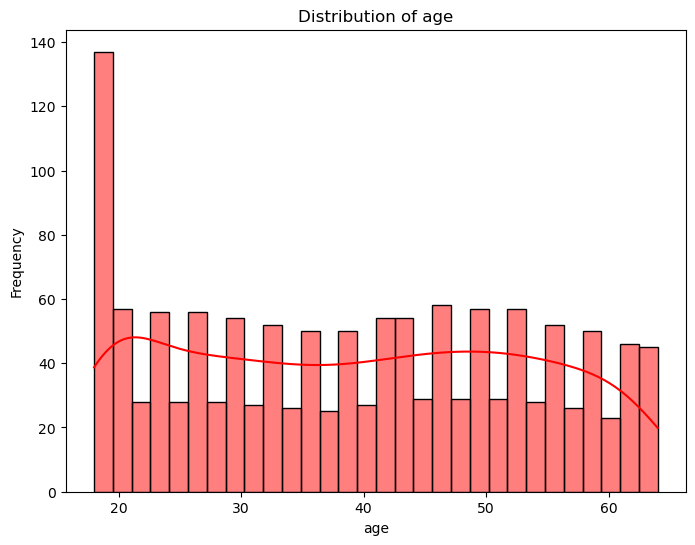

In [318]:
plt.figure(figsize=(8,6))
sns.histplot(data['age'], bins=30, kde=True,color='red')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Distribution of age')
plt.show()

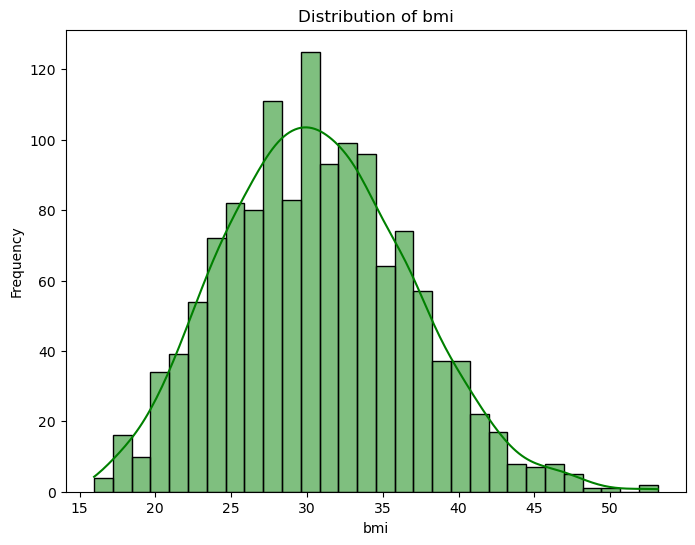

In [319]:
plt.figure(figsize=(8,6))
sns.histplot(data['bmi'], bins=30, kde=True,color='green')
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.title('Distribution of bmi');
plt.show()

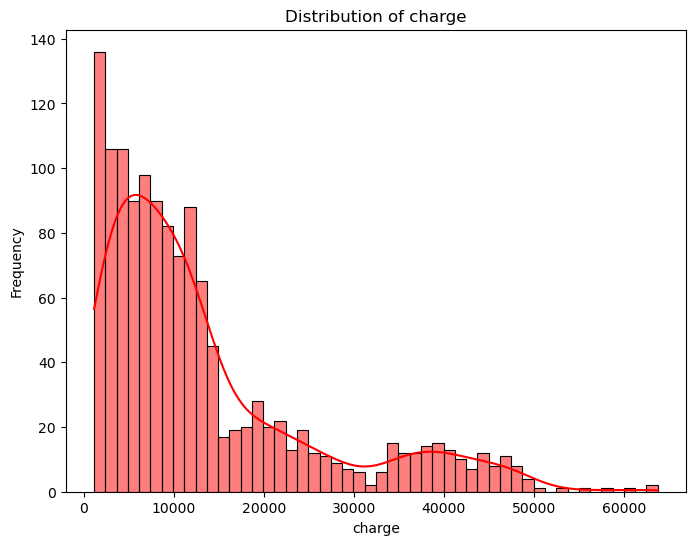

In [320]:
plt.figure(figsize=(8,6))
sns.histplot(data['charges'], bins=50, kde=True,color='red')
plt.xlabel('charge')
plt.ylabel('Frequency')
plt.title('Distribution of charge');
plt.show()

In [321]:
data['charges'].median()

9382.033

Text(0.5, 1.0, 'countplot for region column')

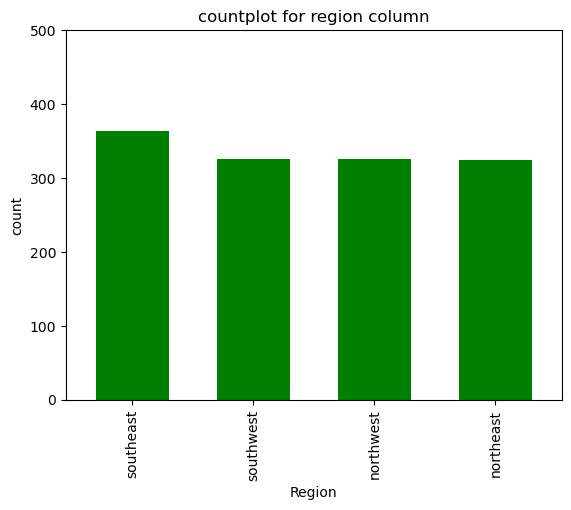

In [322]:
data['region'].value_counts().plot(kind='bar',width =0.6,color = 'green')
plt.ylim(0,500)
plt.xlabel('Region')
plt.ylabel('count')
plt.title('countplot for region column')

([<matplotlib.patches.Wedge at 0x194ba1bccd0>,
 [Text(-0.018078568997004985, 1.0998514287589123, 'male'),
  Text(0.018078568997005343, -1.0998514287589123, 'female')],
 [Text(-0.009861037634729992, 0.5999189611412249, '51%'),
  Text(0.009861037634730185, -0.5999189611412248, '49%')])

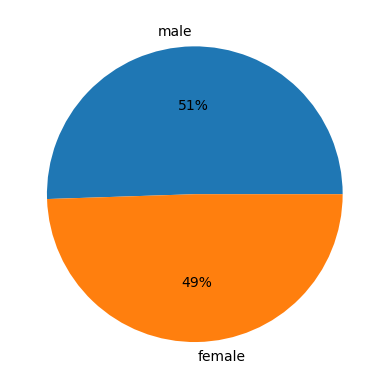

In [323]:
data1 = data['sex'].value_counts()
plt.pie(data1,labels=data1.keys(), autopct='%.0f%%')

## Bivariate analysis

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


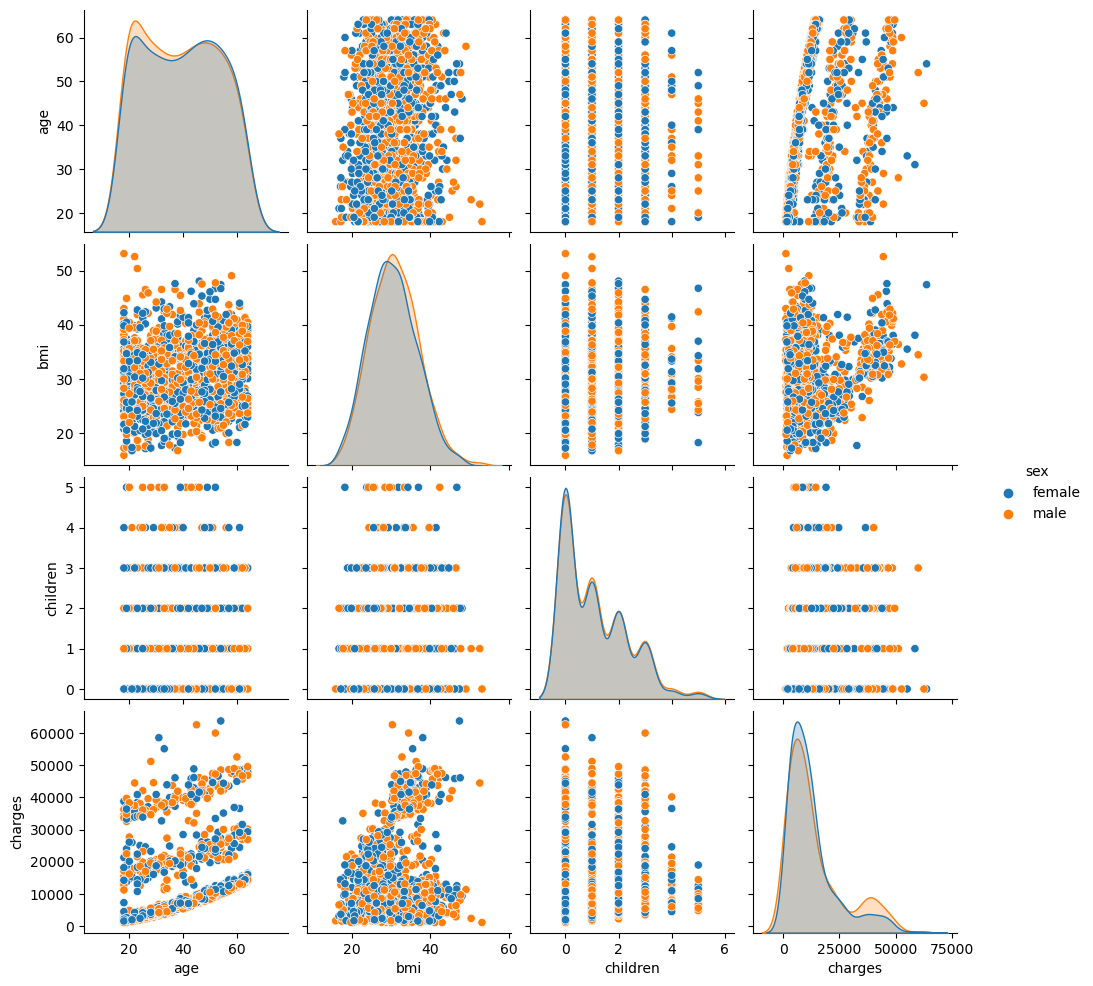

In [324]:
sns.pairplot(data,diag_kind='kde',hue='sex')
plt.show()

<Axes: >

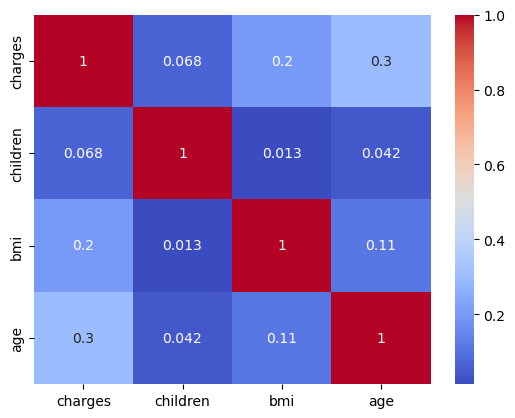

In [325]:
sns.heatmap(data[['charges','children','bmi','age']].corr(),annot=True,cmap='coolwarm')

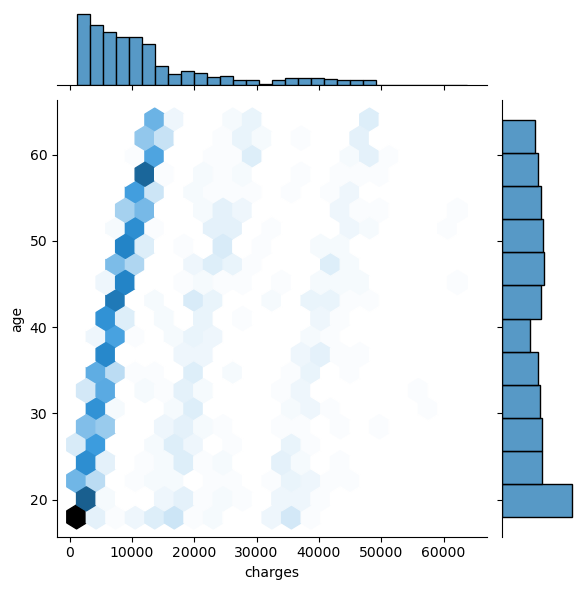

In [326]:
sns.jointplot(x='charges',y='age',data=data,kind='hex')

<Axes: xlabel='charges', ylabel='age'>

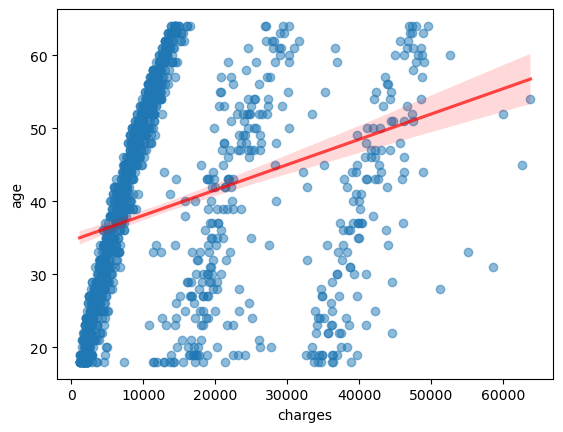

In [327]:
sns.regplot(x='charges',y='age',data=data,scatter_kws={'alpha': 0.5},line_kws={'alpha': 0.7, 'color': 'red'})

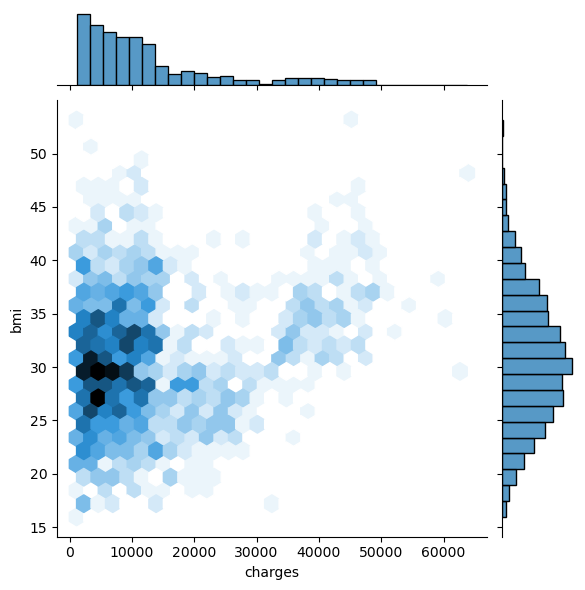

In [328]:
sns.jointplot(x='charges',y='bmi',data=data,kind='hex')

<Axes: xlabel='charges', ylabel='bmi'>

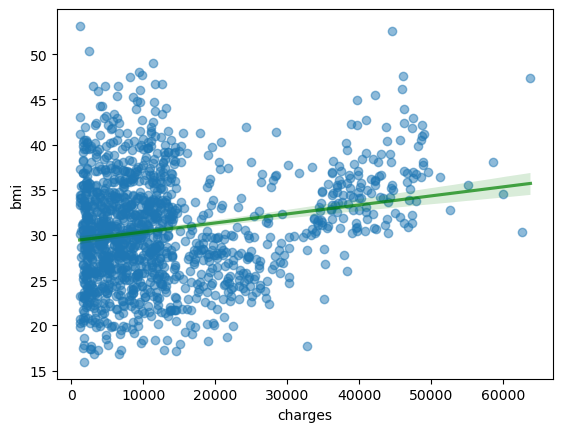

In [329]:
sns.regplot(x='charges',y='bmi',data=data,scatter_kws={'alpha': 0.5},line_kws={'alpha': 0.7, 'color': 'green'})

In [330]:
dada = pd.crosstab(data['region'],data['sex'])
print(dada)

sex        female  male
region                 
northeast     161   163
northwest     164   161
southeast     175   189
southwest     162   163


Text(0, 0.5, 'count')

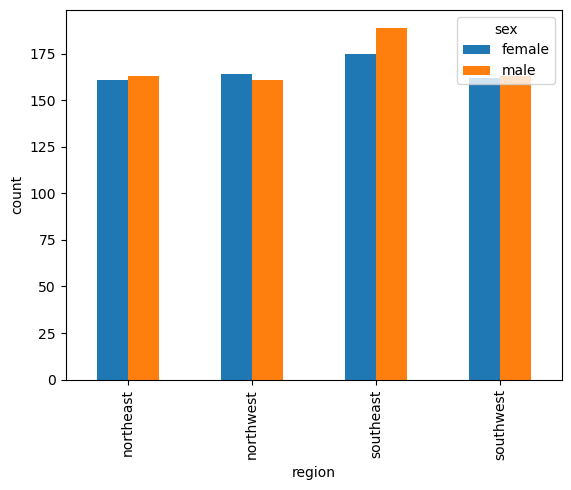

In [331]:
dada.plot(kind='bar',stacked=False)
plt.ylabel('count')

# Label Encoding 

In [332]:
encoder = LabelEncoder()
encoded_gender = encoder.fit_transform(data['sex'])
data_sex = pd.DataFrame(encoded_gender)
data['sex_encoded'] = data_sex
encoded_smoker = encoder.fit_transform(data['smoker'])
data['encoded_smoker'] = encoded_smoker
print(data.head(20))


    age     sex     bmi  children smoker     region      charges  sex_encoded  \
0    19  female  27.900         0    yes  southwest  16884.92400            0   
1    18    male  33.770         1     no  southeast   1725.55230            1   
2    28    male  33.000         3     no  southeast   4449.46200            1   
3    33    male  22.705         0     no  northwest  21984.47061            1   
4    32    male  28.880         0     no  northwest   3866.85520            1   
5    31  female  25.740         0     no  southeast   3756.62160            0   
6    46  female  33.440         1     no  southeast   8240.58960            0   
7    37  female  27.740         3     no  northwest   7281.50560            0   
8    37    male  29.830         2     no  northeast   6406.41070            1   
9    60  female  25.840         0     no  northwest  28923.13692            0   
10   25    male  26.220         0     no  northeast   2721.32080            1   
11   62  female  26.290     

# Removing columns 

In [333]:

data.drop(['sex','smoker'], axis=1, inplace=False)
# 0 is female and no 

,age,bmi,children,region,charges,sex_encoded,encoded_smoker
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,1,0
1334,18,31.920,0,northeast,2205.98080,0,0
1335,18,36.850,0,southeast,1629.83350,0,0
1336,21,25.800,0,southwest,2007.94500,0,0


# Changing the order of the dataframe columns 

In [334]:
data = data.loc[:,['age','bmi','children','region','sex_encoded','encoded_smoker','charges']]
print(data)

      age     bmi  children     region  sex_encoded  encoded_smoker  \
0      19  27.900         0  southwest            0               1   
1      18  33.770         1  southeast            1               0   
2      28  33.000         3  southeast            1               0   
3      33  22.705         0  northwest            1               0   
4      32  28.880         0  northwest            1               0   
...   ...     ...       ...        ...          ...             ...   
1333   50  30.970         3  northwest            1               0   
1334   18  31.920         0  northeast            0               0   
1335   18  36.850         0  southeast            0               0   
1336   21  25.800         0  southwest            0               0   
1337   61  29.070         0  northwest            0               1   

          charges  
0     16884.92400  
1      1725.55230  
2      4449.46200  
3     21984.47061  
4      3866.85520  
...           ...  
1333  1

# Feature  scaling 


In [335]:
scaler =  MinMaxScaler()
scale_data =scaler.fit_transform(data[['age','bmi']])
data12 = pd.DataFrame(scale_data)
print(data12.head())

          0         1
0  0.021739  0.321227
1  0.000000  0.479150
2  0.217391  0.458434
3  0.326087  0.181464
4  0.304348  0.347592



# Feature Selection 

In [336]:
# feature 
X = data.drop(['charges','region'],axis=1)
y= data['charges'] # target data 
print(X)

      age     bmi  children  sex_encoded  encoded_smoker
0      19  27.900         0            0               1
1      18  33.770         1            1               0
2      28  33.000         3            1               0
3      33  22.705         0            1               0
4      32  28.880         0            1               0
...   ...     ...       ...          ...             ...
1333   50  30.970         3            1               0
1334   18  31.920         0            0               0
1335   18  36.850         0            0               0
1336   21  25.800         0            0               0
1337   61  29.070         0            0               1

[1338 rows x 5 columns]


# Train Test split 

In [337]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


# Linear Regression model

In [338]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Prediction on training data 

In [339]:
y_pred = model.predict(X_train)

# Prediction on test data 

In [340]:
y_pred2 = model.predict(X_test)

In [341]:
print(y_pred.shape)
print(y_pred2.shape)


(1070,)
(268,)


In [342]:
slope = model.coef_
print(slope)

[ 2.57068962e+02  3.27533514e+02  4.27254431e+02 -7.95178837e+00
  2.36539033e+04]


In [343]:
intercept = model.intercept_
print(intercept)

-12113.45125091708


# Model Evaluation on training data 

In [344]:
r2 = r2_score(y_train, y_pred)
print(r2)
y_predict = pd.DataFrame(y_pred)


0.7410888590280913


In [345]:
y_predict.shape


(1070, 1)

# Model Evaluation on testing data

In [346]:
r2_test = r2_score(y_test,y_pred2)
print(r2_test)

0.7811302113434095


###  R2 score is higher on the testing data (0.78) compared to the training data (0.74) is typically considered favorable. It indicates that the model is likely not suffering from overfitting to the training data and has some ability to generalize to unseen data. 

In [347]:
X_test.shape

(268, 5)

In [348]:
y_test.shape


(268,)

In [349]:
import pickle 
with open('insurance1.pkl','wb') as file:
    pickle.dump(model,file)
    file.close()


# Model Building using statsmodel 

In [350]:

model1 = sm.OLS(y,X).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              1826.
Date:                Tue, 06 Feb 2024   Prob (F-statistic):                        0.00
Time:                        13:40:53   Log-Likelihood:                         -13627.
No. Observations:                1338   AIC:                                  2.726e+04
Df Residuals:                    1333   BIC:                                  2.729e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [351]:
ols_predict = model1.predict(X)
print(ols_predict)

0       28204.004245
1        4382.925234
2        6839.948544
3        6692.869583
4        6726.309164
            ...     
1333    11128.944225
1334     4770.072529
1335     4955.183915
1336     5135.536087
1337    36581.533375
Length: 1338, dtype: float64


In [352]:
print(r2_score(y,ols_predict))

0.7195598079780988


# Actual vs predicted value plot

Text(0.5, 1.0, 'Actual vs. Predicted Values')

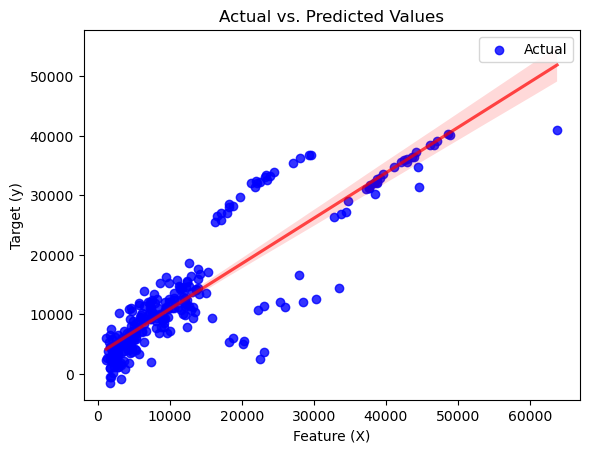

In [353]:
sns.regplot(x=y_test, y= y_pred2, label='Actual', color='blue',line_kws={'alpha': 0.7, 'color': 'red'})

plt.plot()
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.title('Actual vs. Predicted Values')

# Residual 

In [354]:
residual = y_train - y_pred

# Ploting the residual 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7464\3752943235.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residual,shade = True)


Text(0.5, 1.0, 'kernel density plot of residual value')

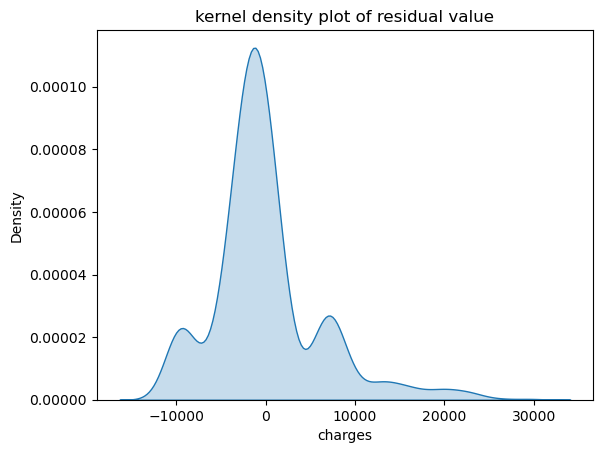

In [355]:
sns.kdeplot(residual,shade = True)
plt.title("kernel density plot of residual value")

<Axes: xlabel='charges'>

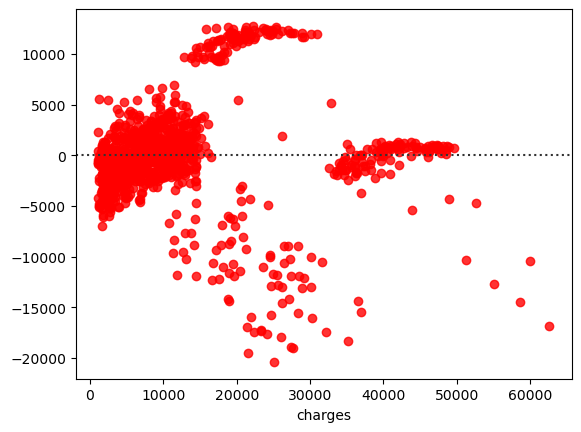

In [356]:
sns.residplot(x= y_train,y= y_pred, color = 'red')